# PROJECT : Digit Recognizer with MNIST Dataset

MNIST ("Modified National Institute of Standards and Technology") is the de facto “Hello World” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In [27]:
# Import librairies needed
import keras 
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt

In [4]:
# Split our data
(x_train , y_train), (x_test , y_test) = mnist.load_data()

In [5]:
# Take a look on shape of our data
x_train.shape ,y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

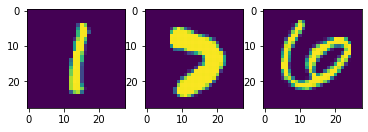

In [6]:
# Visualing our images
randindices = np.random.randint(x_train.shape[0], size = 3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(x_train[randindices[0], : , : ])

plt.subplot(1,3,2)
plt.imshow(x_train[randindices[1], : , : ])

plt.subplot(1,3,3)
plt.imshow(x_train[randindices[2], : , : ])

In [7]:
print(y_train[randindices[0]],y_train[randindices[1]],y_train[randindices[2]])

1 7 6


In [8]:
x_train[randindices[0], : , :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  57, 253, 203,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 131, 252, 252,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
# Split and reshape our data
x_train = x_train.reshape(60000 , 784)
x_test = x_test.reshape(10000 , 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/= 255
x_test/= 255 

x_train.shape , x_test.shape

((60000, 784), (10000, 784))

In [10]:
# Convert classes on categorical classes
from tensorflow.keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test , num_classes)

y_train.shape , y_test.shape

((60000, 10), (10000, 10))

In [11]:
# Construct our model
model = Sequential()
model.add(Dense(512 , activation='relu', input_shape = (784,)))
model.add(Dropout(0.3))
model.add(Dense(256 , activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(128 , activation= 'relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes , activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [12]:
model.compile	(loss = 'categorical_crossentropy',
               optimizer = Adam(lr = 1e-3),
               metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [13]:
batch_size = 128
epochs  = 20

In [14]:
Model  = model.fit( x_train,
                   y_train,
                   batch_size = batch_size ,
                   epochs = epochs 
                   )

Epoch 1/20
469/469 [==============================] - 8s 15ms/step - loss: 0.3519 - accuracy: 0.8932
Epoch 2/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1427 - accuracy: 0.9584
Epoch 3/20
469/469 [==============================] - 7s 15ms/step - loss: 0.1073 - accuracy: 0.9679
Epoch 4/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0856 - accuracy: 0.9741
Epoch 5/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0783 - accuracy: 0.9769
Epoch 6/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0661 - accuracy: 0.9794
Epoch 7/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0610 - accuracy: 0.9810
Epoch 8/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0525 - accuracy: 0.9838
Epoch 9/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0495 - accuracy: 0.9848
Epoch 10/20
469/469 [==============================] - 7s 14ms/step - loss: 0.0450 - accura

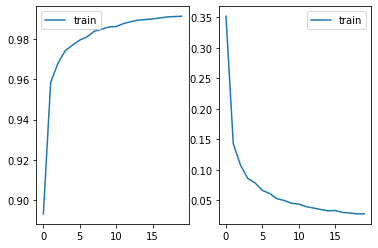

In [16]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(Model.history['accuracy'] , label = 'train')
plt.legend()
plt.subplot(1,2,2)
plt.plot(Model.history['loss'] , label = 'train')
plt.legend()

In [17]:
score = model.evaluate(x_test, y_test)
print("Test loss : ", score[0])
print("Test accuracy : ", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0748 - accuracy: 0.9831
Test loss :  0.07481217384338379
Test accuracy :  0.9830999970436096


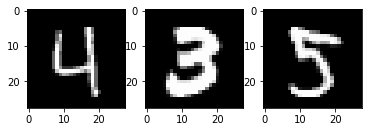

In [18]:
randindices = np.random.randint(x_test.shape[0],size=3)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(np.reshape(x_test[randindices[0],:],(28,28)), cmap='gray')

plt.subplot(1,3,2)
plt.imshow(np.reshape(x_test[randindices[1],:],(28,28)), cmap='gray')

plt.subplot(1,3,3)
plt.imshow(np.reshape(x_test[randindices[2],:],(28,28)), cmap='gray')

In [32]:
predictions = model.predict(x_test)
predictions.shape

(10000, 10)

In [21]:
np.argmax(predictions[randindices[0],:]), np.argmax(predictions[randindices[1],:]), np.argmax(predictions[randindices[2],:])

(4, 3, 5)

In [22]:
np.max(predictions[randindices[0],:])*100, np.max(predictions[randindices[1],:])*100, np.max(predictions[randindices[2],:])*100

(100.0, 100.0, 100.0)